# Project: Titanic_Machine Learning from Disater

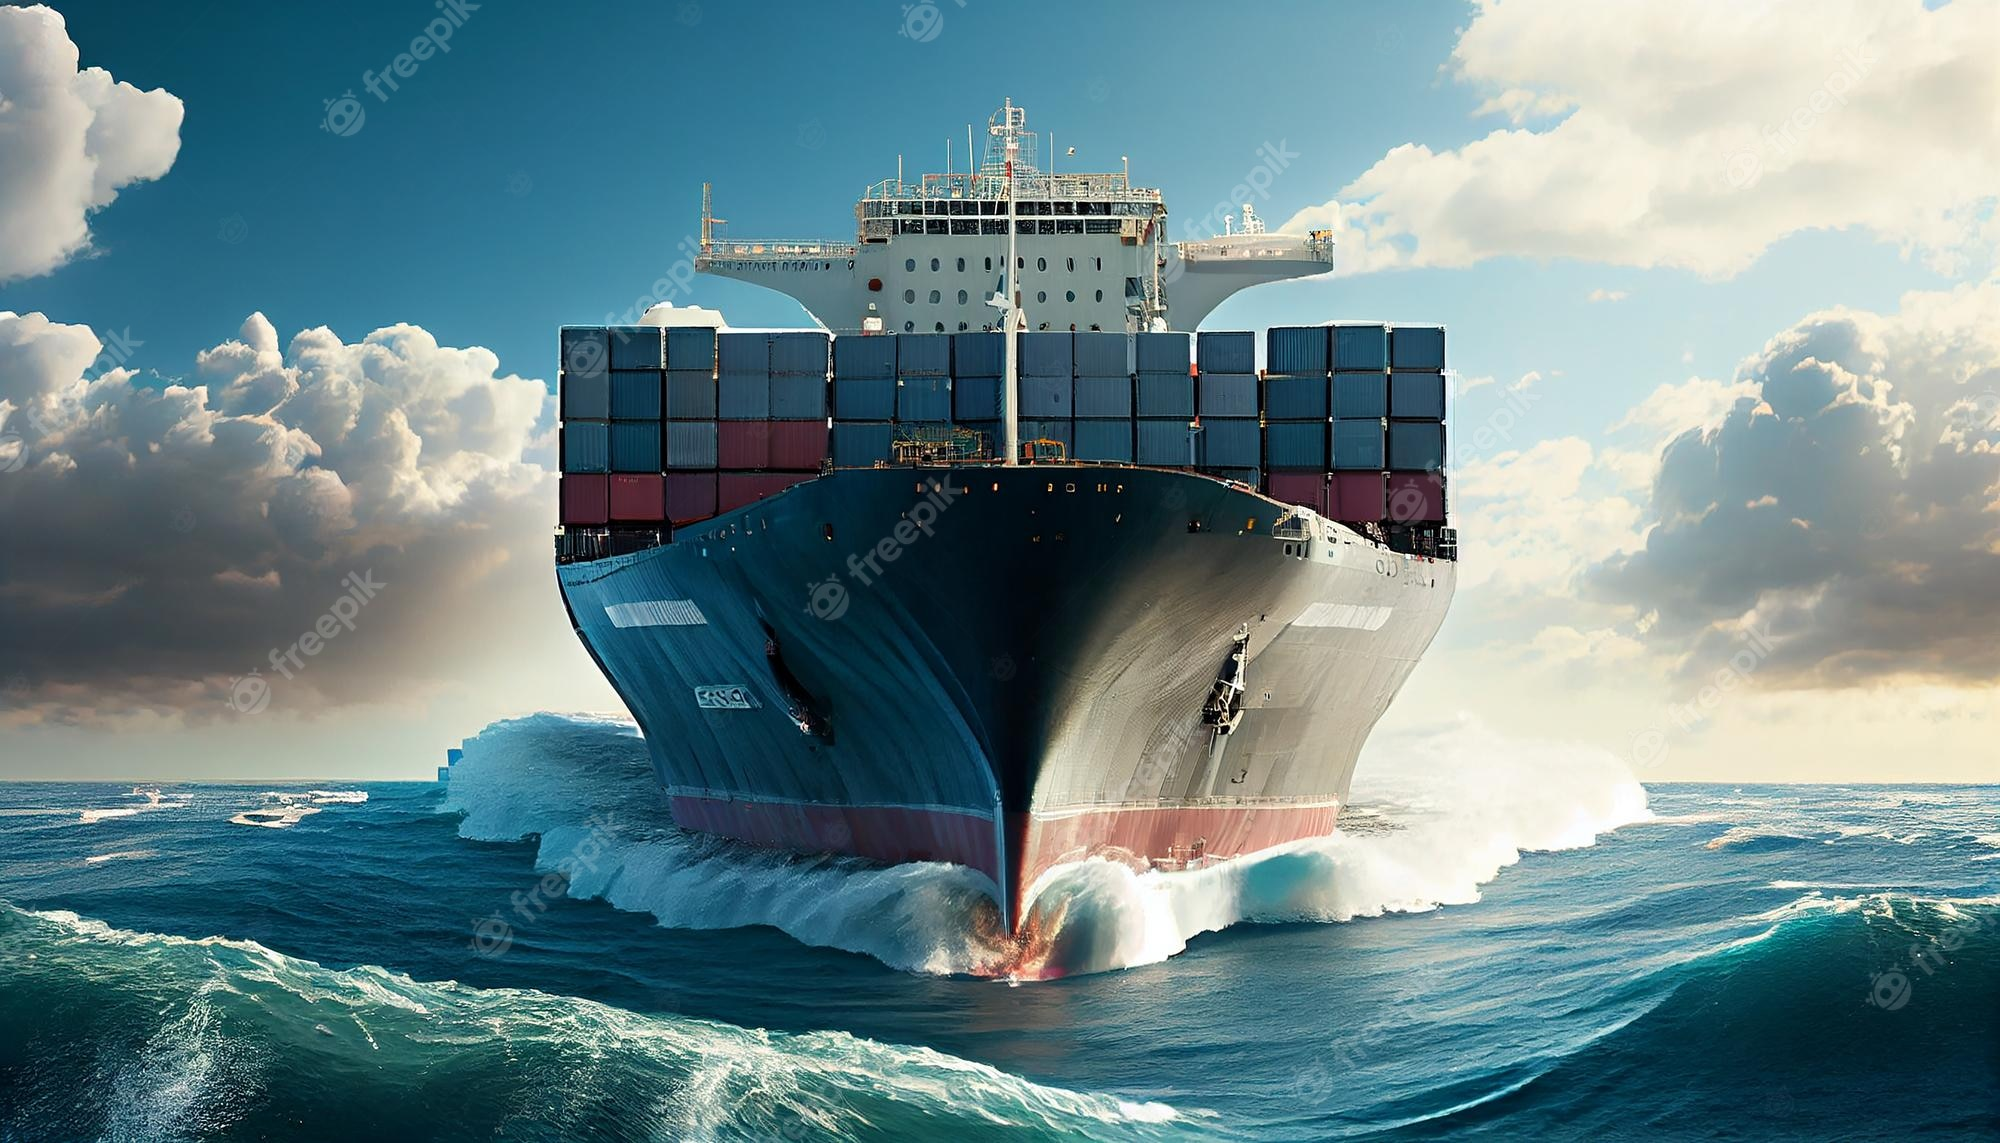

# 1. Import library

In [4]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
train_df=pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [6]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# train_df.set_index(train_df.PassengerId, inplace =True)
# train_df.drop("PassengerId", axis = 1,inplace=True)

In [10]:
# train_df.head()


In [11]:
train_df = pd.read_csv("./train.csv", index_col = "PassengerId")
test_df = pd.read_csv("./test.csv",index_col = "PassengerId")

In [12]:
train_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 2. Pre_Processing

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [14]:
converted_features = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
converted_features_train = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
converted_features_test = ["Pclass","Sex","SibSp","Parch","Embarked"]

# trong dts của test_csv ko có 'Survived'

In [15]:
for feature in converted_features_train:
    train_df[feature] = train_df[feature].astype('category')
for feature in converted_features_test:
    test_df[feature] = test_df[feature].astype('category')

# Chúng ta có thể viết hàm cũng đc nhma lúc làm prj t ko thích làm theo cách ở dưới,có lẽ về sau sẽ có thay đổi....

# def convert_cat(df, feature):
#     for feature in features:
#         df[feature] = df[feature].astype("category")




In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


###  2.1 Distribution of Numerical feature values across the sample
(phân bố của các dữ liệu)

In [17]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### 2.2 Distribution of Categorical feature 

In [18]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory Data Analysis(EDA)
## 3.1 Correlating categorical features 
- Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`, `Sibsp`,`Parch`


In [19]:
train_df["Survived"].value_counts().to_frame()

# Hàm này để chỉ ra có bn người sống sót 


,Survived
0,549
1,342


In [20]:
train_df["Survived"].value_counts(normalize = True).to_frame()

# Hàm này để chỉ ra phần trăm


,Survived
0,0.616162
1,0.383838


Có 38% sống sót sau tai nạn

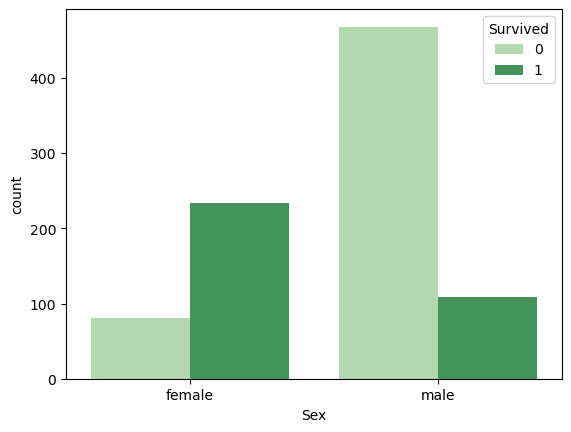

In [21]:
sns.countplot(data=train_df, x='Sex',hue = "Survived", palette = 'Greens');

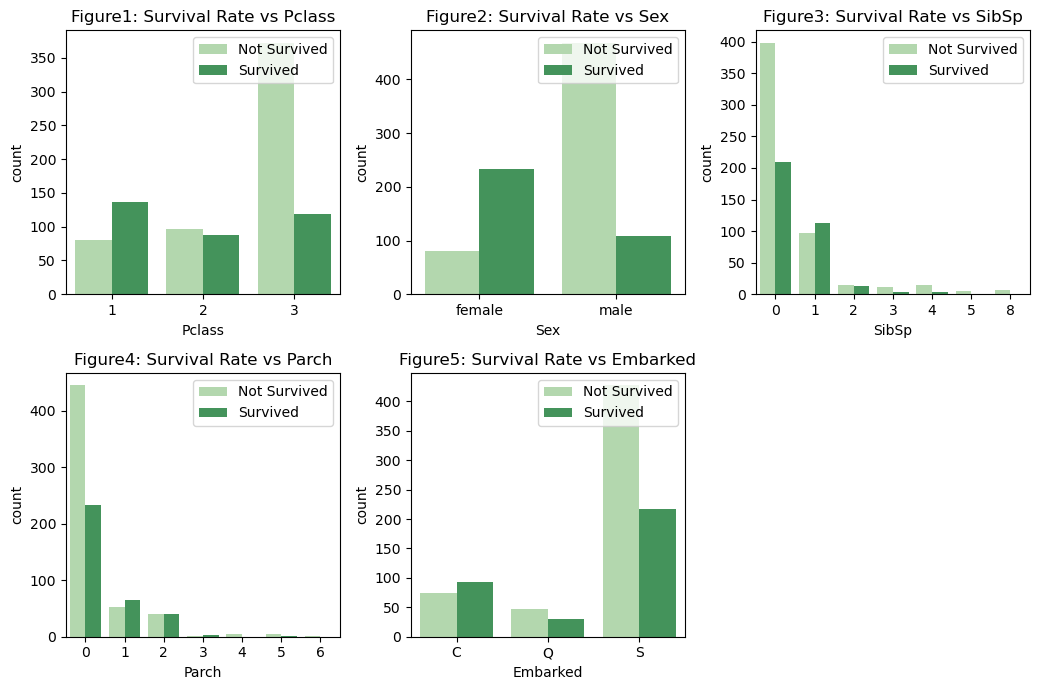

In [22]:
cols = ['Pclass','Sex','SibSp','Parch','Embarked']

n_rows = 2
n_cols = 3

fig ,ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # Vị trí các phần tử trong list 'cols'
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data = train_df, x= cols[i], hue= 'Survived', palette = "Greens", ax = ax_i)
            ax_i.set_title(f"Figure{i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title = '', loc='upper right', labels = ['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False)            
plt.tight_layout()            
plt.show()            


## 3.2 EDA for Numerical Features

### Age

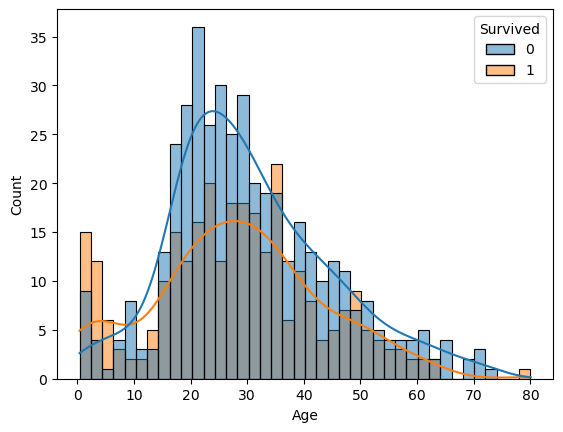

In [23]:
sns.histplot(data=train_df, x='Age',hue = 'Survived', bins= 40, kde =True);

### Fare


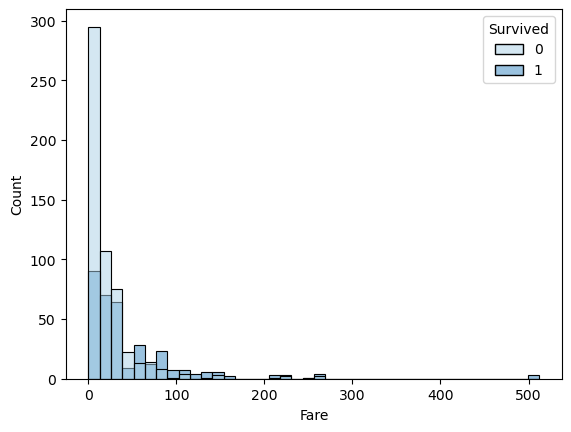

In [24]:
sns.histplot(data=train_df, x='Fare', hue = 'Survived', bins =40, palette = 'Blues');

In [25]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
# CHia khoảng thành 4 phần như phân tích trên
# Dùng hàm pd.qcut

pd.qcut(train_df['Fare'], 4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

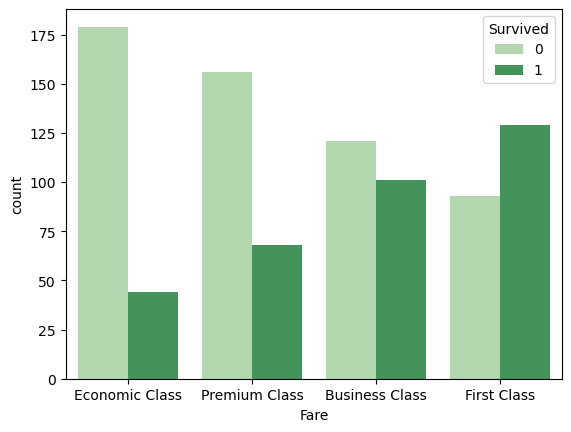

In [27]:
fare_categories = ['Economic Class', 'Premium Class', 'Business Class', 'First Class']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette = "Greens");

# 4. Feature Engineering & Data Wrangling
- Tạo ra hoặc thêm bớt các dữ liệu mới 
- Sắp xếp, làm sạch các dữ liệu để thuận tiện cho việc phân tích

## Name
- Regular Expression

In [28]:
train_df['Name'].head()


PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [29]:
import re

def extract_title(name):
    p = re.compile(r", (\w+)\.")
    match = p.search(name)
    if match is None:
        return None
    return match.group(1).strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [30]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Mme           1
Ms            1
Lady          1
Sir           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

In [31]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [32]:
test_df['Title'] = test_df['Name'].apply(lambda name:extract_title(name))

In [33]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [34]:
def group_title(title):
    if title in ['Mr','Miss','Mrs','Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Other"


# train_df['Title'].apply(lambda title: title if title in  ['Mr','Miss','Mrs','Master']else "Other")      
train_df['Title']=train_df['Title'].apply(lambda title: group_title(title))
test_df['Title']=test_df['Title'].apply(lambda title: group_title(title))    



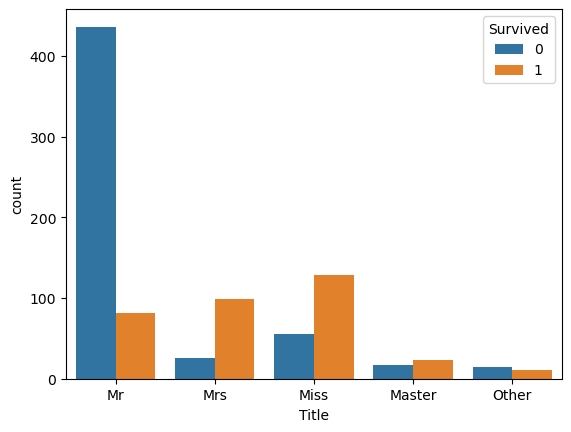

In [35]:
sns.countplot(data=train_df,x='Title',hue='Survived');                  

## Family
- Sibsp, Parch

In [36]:
train_df['Family_Size'] = train_df['SibSp'].astype('int')+train_df['Parch'].astype('int')+1

In [37]:
test_df['Family_Size'] = test_df['SibSp'].astype('int')+test_df['Parch'].astype('int')+1

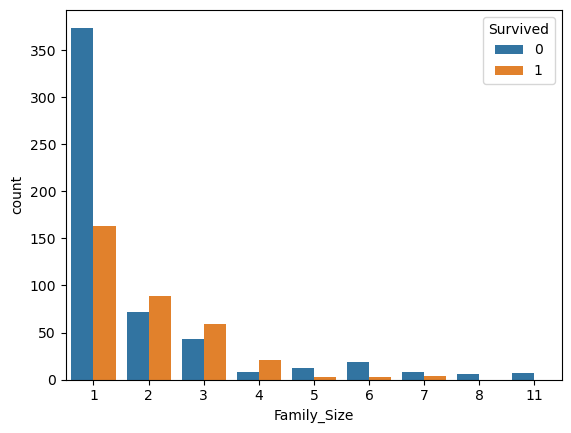

In [38]:
sns.countplot(data=train_df, x='Family_Size', hue='Survived');

1. Đi 1 người vào 1 group
2. Đi từ 2-4 người vào 1 group: Gia đình nhỏ
3. Đi từ 5-6 người vaof 1 grup : Medium
4. Đi từ 6-11 người vaof 1 grup : large


In [39]:
train_df['Family_Cat']=pd.cut(train_df['Family_Size'],bins =[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])
test_df['Family_Cat']=pd.cut(test_df['Family_Size'],bins =[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

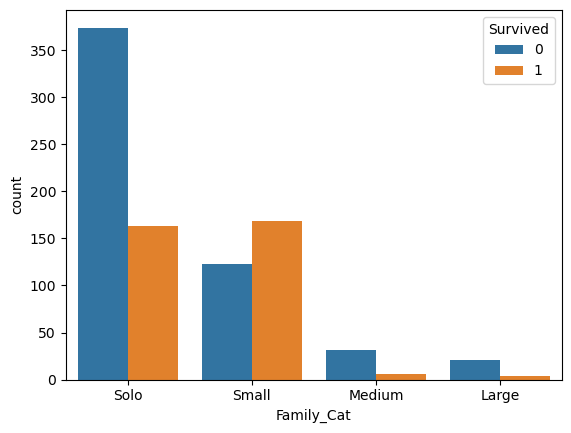

In [40]:
sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

## 4.2 Data Wrangling


In [41]:
num_feature = ['Age','Fare']
cat_feature = ['Sex','Pclass','Embarked','Title','Family_Cat']
feature_cols  = num_feature + cat_feature
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [42]:
def display_missing(df,feature_cols):
    n_rows =df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f" {col} has {missing_count*100/n_rows:.2f} missing value")
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

 Age has 19.87 missing value
 Embarked has 0.22 missing value
 Age has 20.57 missing value
 Fare has 0.24 missing value


### Fill missing values
#### Age
- Filling missing values with "median" of whole dataset
- or we can consider another factor and group by them


In [43]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median(numeric_only=True)['Age']

In [44]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [45]:
#Filling the missing values in Age withe the medians of Sex and PClass groups
train_df['Age']= train_df.groupby(['Sex','Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()) )
test_df['Age']= test_df.groupby(['Sex','Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()) )

In [46]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

 Embarked has 0.22 missing value
 Fare has 0.24 missing value


In [47]:
X = train_df[feature_cols]
y =train_df['Survived']


In [48]:
X_test =test_df[feature_cols]


In [55]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

num_transformer =  Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler',StandardScaler())])
cat_transformer =  Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder',OneHotEncoder(handle_unknown ='ignore'))])

In [56]:
prepoccessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_feature),
    ('cat',cat_transformer,cat_feature)
])

In [57]:
prepoccessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

# 5. Model Training

In [58]:
X = prepoccessor.transform(X)
X_test = prepoccessor.transform(X_test)

In [59]:
X_train, X_val,y_train,y_val = train_test_split(X,y,test_size =0.2)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier


In [61]:
log_reg=LogisticRegression(solver = 'liblinear',max_iter =1000)
clf = log_reg.fit(X_train,y_train)

In [62]:
log_reg.score(X_val,y_val)

0.8379888268156425

In [63]:
#Decision tree
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
decision_tree.score(X_val,y_val)

0.7932960893854749

In [69]:
predictions = clf.predict(X_val)

from sklearn.metrics import accuracy_score
accuracy_score(y_val,predictions)

0.8379888268156425

In [100]:
submission_preds = clf.predict(X_test)
# test_df

# le = preprocessing.LabelEncoder()
# cols = ["Sex","Embarked"]
# for col in columns:
#     train_df[col] = le.fit_transform(train_df[col])
#     test_df[col] = le.transform(test_df[col])
# X_test

In [112]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family_Size,Family_Cat
PassengerID,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,1,Solo
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,2,Small
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,1,Solo
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,1,Solo
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,3,Small
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S,Mr,1,Solo
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Other,1,Solo
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,1,Solo


In [118]:

df = pd.DataFrame({"PassengerId":test_df.index,
                  "Survived":submission_preds
                  
                  })
df.to_csv("Submission.csv",index = False)
# test_df
# test_ids = test_df.index[0]

892